In [26]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=coinmarketcap.com&amp;callback=_gfp_s_&amp;client=ca-pub-5965828471560237"></script><script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-MNVXW26"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202310260102/show_ads_impl_fy2021.js"></script><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> func
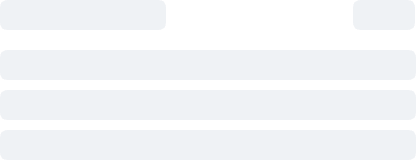

In [27]:
# membuat object driver dan membuka chrome
driver = webdriver.Chrome()

url = "https://coinmarketcap.com/"
# memerintahkan driver browser untuk mengakses url yang diminta
driver.get(url)

# mendapatkan page source dari url yang baru saja diakses
html_code = driver.page_source

# mengtranslate string html ke html yang mudah dibaca
soup = BeautifulSoup(html_code, 'html.parser')

soup

In [28]:
# card_list = soup.find_all('div',{'class':'sc-66133f36-2 cgmess'})


In [29]:
coin = []
price = []
market_cap = []
volume = []
coin_suplay = []


for i in range(1, 6):
    url=f"https://coinmarketcap.com/?page={i}"
    driver.get(url)
    html = driver.page_source

    soup = BeautifulSoup(html, "html.parser")
    
    coin_html = soup.find_all('p',{'class':'kKpPOn'})

    for card in coin_html:
        text = card.get_text().strip()
        print(card.get_text())
        coin.append(text)

    price_html = soup.find_all('div',{'class':'gDrtaY'})
    # price_html
    for card in price_html:
        text = card.get_text().strip()
        if text == '':
            price.append(0)
        else:
            price.append(text)

        print(card.get_text())
        # price.append(text)

    market_html = soup.find_all('span',{'class':'bCdPBp'})

    for card in market_html:
        text = card.get_text().strip()
        print(card.get_text())
        market_cap.append(text)

    volume_html = soup.find_all('p',{'class':'jZrMxO'})

    for card in volume_html:
        text = card.get_text().strip()
        print(card.get_text())
        volume.append(text)

    coin_suplay_html = soup.find_all('p',{'class':'WfVLk'})

    for card in coin_suplay_html:
        text = card.get_text().strip()
        print(card.get_text())
        coin_suplay.append(text)







Bitcoin
Ethereum
Tether USDt
BNB
XRP
USDC
Solana
Cardano
Dogecoin
TRON
$34,424.15
$1,797.42
$1.00
$224.40
$0.6018
$0.9999
$39.28
$0.2877
$0.06675
$0.09832
$672,105,359,475
$216,200,731,461
$84,834,490,540
$34,042,056,876
$32,233,333,278
$24,730,646,597
$16,477,680,197
$10,140,530,120
$9,455,355,206
$8,729,834,388
Last 7 Days
$672.11B$672,105,359,475
$14,050,901,977
$216.2B$216,200,731,461
$6,744,308,427
$84.83B$84,834,490,540
$27,788,697,108
$34.04B$34,042,056,876
$307,385,499
$32.23B$32,233,333,278
$1,821,159,386
$24.73B$24,730,646,597
$3,308,680,853
$16.48B$16,477,680,197
$1,657,354,708
$10.14B$10,140,530,120
$299,565,731
$9.46B$9,455,355,206
$459,944,008
$8.73B$8,729,834,388
$267,383,422
19,530,112 BTC
120,269,303 ETH
84,806,706,137 USDT
151,703,571 BNB
53,560,508,378 XRP
24,730,684,762 USDC
419,441,286 SOL
35,248,683,958 ADA
141,649,656,384 DOGE
88,789,160,970 TRX
Celestia
Dash
Oasis Network
JUST
Basic Attention Token
1inch Network
FLOKI
Astar
SafePal
Fetch.ai
$2.38
$28.90
$0.0509


In [30]:
print(len(coin))
print(len(price))
print(len(market_cap))
print(len(coin_suplay))

50
50
50
50


In [31]:
import pandas as pd

df = pd.DataFrame({
    'coin': coin,
    'price': price,
    'market_cap': market_cap,
    'coin_suplay': coin_suplay
})

df.head()


,coin,price,market_cap,coin_suplay
0,Bitcoin,"$34,424.15","$672,105,359,475","19,530,112 BTC"
1,Ethereum,"$1,797.42","$216,200,731,461","120,269,303 ETH"
2,Tether USDt,$1.00,"$84,834,490,540","84,806,706,137 USDT"
3,BNB,$224.40,"$34,042,056,876","151,703,571 BNB"
4,XRP,$0.6018,"$32,233,333,278","53,560,508,378 XRP"
